In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])
# 0 - Brain tumor
# 1 - not Brain tumor

OneHotEncoder()

In [3]:
data = []
paths = []
result = []

for r, d, f in os.walk(r"C:\Users\rohit\OneDrive\Desktop\DATASET\Yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
paths = []
for r, d, f in os.walk(r"C:\Users\rohit\OneDrive\Desktop\DATASET\No"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
img.shape

(128, 128, 3)

In [6]:
data = np.array(data)
data.shape

(4403, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape(4403,2)
result.shape

(4403, 2)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [9]:
model = Sequential()


model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [10]:
x_train.shape

(3522, 128, 128, 3)

In [11]:
y_train.shape

(3522, 2)

In [12]:
x_test.shape

(881, 128, 128, 3)

In [13]:
y_test.shape

(881, 2)

In [14]:
history= model.fit(x_train, y_train, epochs = 30, batch_size = 50, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
71/71 [==============================] - 78s 1s/step - loss: 5.1343 - val_loss: 1.2076
Epoch 2/30
71/71 [==============================] - 77s 1s/step - loss: 0.3745 - val_loss: 0.3167
Epoch 3/30
71/71 [==============================] - 77s 1s/step - loss: 0.1950 - val_loss: 0.4489
Epoch 4/30
71/71 [==============================] - 72s 1s/step - loss: 0.1268 - val_loss: 0.7005
Epoch 5/30
71/71 [==============================] - 75s 1s/step - loss: 0.0990 - val_loss: 0.8298
Epoch 6/30
71/71 [==============================] - 79s 1s/step - loss: 0.0807 - val_loss: 0.6247
Epoch 7/30
71/71 [==============================] - 74s 1s/step - loss: 0.0587 - val_loss: 0.6727
Epoch 8/30
71/71 [==============================] - 75s 1s/step - loss: 0.0441 - val_loss: 0.5729
Epoch 9/30
71/71 [==============================] - 73s 1s/step - loss: 0.0386 - val_loss: 0.6671
Epoch 10/30
71/71 [==============================] - 81s 1s/step - loss: 0.0297 - val_loss: 0.5371
Epoch 11/30
71/71 [

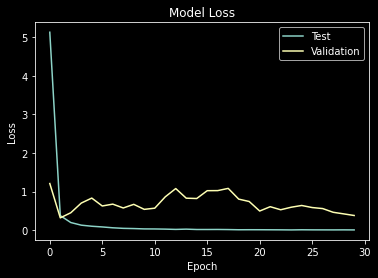

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [16]:
def names(number):
    if number==0:
        return 'Its a brain tumor '
    else:
        return 'Its  not a brain tumor'

99.99927282333374Its  not a brain tumor


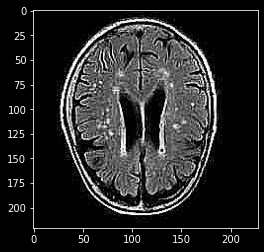

In [18]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\rohit\Downloads\data set new\archive (9)\no\no93.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) +  names(classification))

99.99939203262329Its a brain tumor 


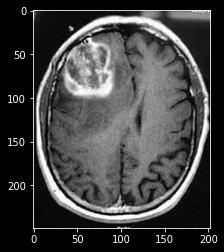

In [27]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\rohit\Downloads\data set new\archive (10)\g1.jpeg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) +  names(classification))

100.0Its  not a brain tumor


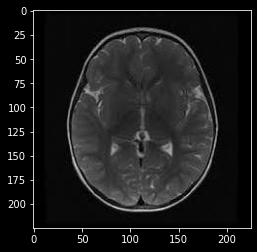

In [26]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\rohit\Downloads\data set new\archive (5)\Training\notumor\Tr-no_1408.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) +  names(classification))

In [22]:
loss_and_metrics = model.evaluate(x_test, y_test, verbose=2)

28/28 - 4s - loss: 0.3777 - 4s/epoch - 134ms/step


In [23]:
print(loss_and_metrics)

0.37769296765327454


In [24]:
loss_accuracy=float(model.evaluate(x_test,y_test))

28/28 [==============================] - 4s 131ms/step - loss: 0.3777
